1-Yeganeh Shafiee <br>
2-Maryam Gazichi <br>
3-Hasan Zohrevand <br>
4-Amir Hoseyn Ardalan <br>
5-Masoud Nematollahi <br>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
ds_path = '/content/drive/MyDrive/meta_stock_prediction/META.csv'

In [4]:
meta_ds = pd.read_csv(ds_path)

In [5]:
meta_ds.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-05,171.270004,172.389999,169.550003,170.720001,170.720001,13210900
1,2017-09-06,170.910004,172.479996,169.570007,172.089996,172.089996,13906300
2,2017-09-07,171.940002,173.309998,170.270004,173.210007,173.210007,18049500
3,2017-09-08,173.089996,173.490005,170.800003,170.949997,170.949997,10998500
4,2017-09-11,172.399994,173.889999,172.199997,173.509995,173.509995,12372000


In [6]:
meta_ds.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1254,2022-08-29,160.660004,163.050003,159.009995,159.169998,159.169998,20052700
1255,2022-08-30,160.350006,161.660004,155.910004,157.160004,157.160004,19567900
1256,2022-08-31,167.070007,167.839996,162.139999,162.929993,162.929993,40953000
1257,2022-09-01,163.580002,167.360001,160.350006,165.360001,165.360001,30145700
1258,2022-09-02,167.449997,167.929993,159.220001,160.320007,160.320007,22609100


In [7]:
meta_ds.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,221.148284,224.079778,218.242907,221.189444,221.189444,2.244455e+07
std,63.210146,63.867548,62.578760,63.230023,63.230023,1.445663e+07
min,123.099998,129.740005,123.019997,124.059998,124.059998,6.046300e+06
25%,175.275002,177.139999,173.029999,175.160004,175.160004,1.417535e+07
50%,194.699997,197.389999,192.119995,194.470001,194.470001,1.884450e+07
75%,267.820007,270.434998,263.919998,266.865006,266.865006,2.600460e+07
max,381.679993,384.329987,378.809998,382.179993,382.179993,1.881199e+08


In [8]:
meta_ds.shape

(1259, 7)

In [9]:
meta_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [10]:
meta_ds_close = meta_ds.iloc[:, 4].values

In [11]:
meta_ds_close

array([170.720001, 172.089996, 173.210007, ..., 162.929993, 165.360001,
       160.320007])

In [12]:
meta_ds_close[0]

170.720001

In [13]:
meta_ds_close.shape

(1259,)

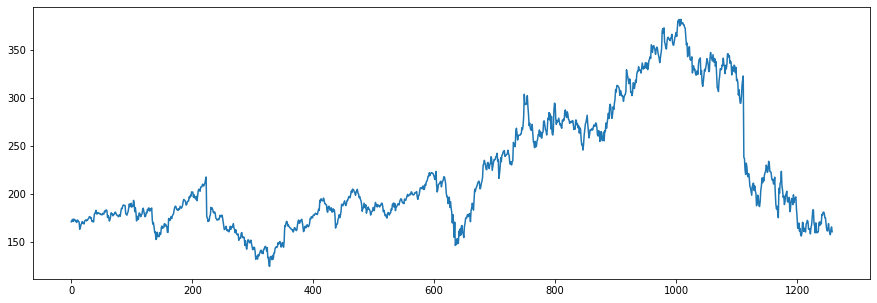

In [16]:
figure(figsize=(15, 5))
plt.plot(meta_ds_close)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
meta_ds_close_scaled = scaler.fit_transform(meta_ds_close.reshape(-1, 1))


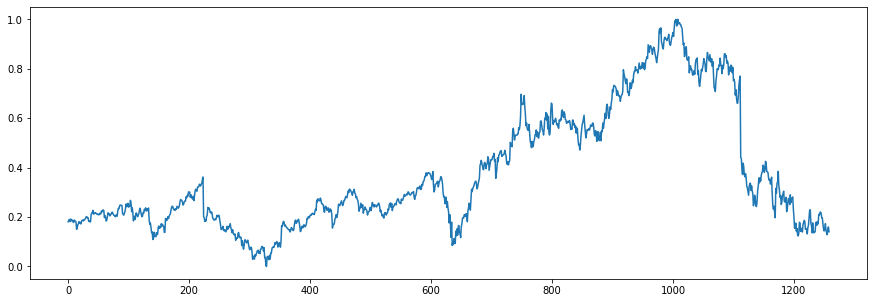

In [22]:
figure(figsize=(15, 5))
plt.plot(meta_ds_close_scaled)

In [23]:
X_meta_close = []
y_meta_close = []

In [24]:
for i in range(40, len(meta_ds_close_scaled)):
  X_meta_close.append(meta_ds_close_scaled[i-40:i, 0])
  y_meta_close.append(meta_ds_close_scaled[i, 0])

In [26]:
X_meta_close = np.array(X_meta_close)
y_meta_close = np.array(y_meta_close)

In [27]:
X_meta_close.shape

(1219, 40)

In [28]:
X_meta_close = np.reshape(X_meta_close, (X_meta_close.shape[0], X_meta_close.shape[1], 1))

In [29]:
X_meta_close.shape

(1219, 40, 1)

In [30]:
y_meta_close = np.reshape(y_meta_close, (-1, 1))

In [31]:
y_meta_close.shape

(1219, 1)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_meta_close, y_meta_close, test_size = 0.2, random_state = 42)

In [33]:
X_train.shape

(975, 40, 1)

In [34]:
y_train.shape

(975, 1)

In [35]:
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers.recurrent import LSTM


In [36]:
lss = 'mean_squared_error'

def define_model(lss):
  input1 = Input(shape=(40, 1))
  x = LSTM(units = 64, return_sequences=True)(input1)
  x = Dropout(0.2)(x)
  x = LSTM(units = 64)(x)
  x = Dropout(0.2)(x)
  x = Dense(32, activation='softmax')(x)
  dnn_output = Dense(1)(x)

  model = Model(inputs=[input1], outputs=[dnn_output])

  model.compile(loss= lss, optimizer='Adam')
  model.summary()
  return model




In [37]:
model = define_model()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 40, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 40, 64)            16896     
                                                                 
 dropout (Dropout)           (None, 40, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33    

In [38]:
history = model.fit(X_train, y_train, epochs= 300, batch_size=32, validation_split=0.1)

Epoch 1/300
28/28 [==============================] - 11s 120ms/step - loss: 0.1272 - val_loss: 0.0564
Epoch 2/300
28/28 [==============================] - 3s 99ms/step - loss: 0.0612 - val_loss: 0.0568
Epoch 3/300
28/28 [==============================] - 3s 101ms/step - loss: 0.0610 - val_loss: 0.0565
Epoch 4/300
28/28 [==============================] - 3s 97ms/step - loss: 0.0607 - val_loss: 0.0563
Epoch 5/300
28/28 [==============================] - 3s 96ms/step - loss: 0.0599 - val_loss: 0.0547
Epoch 6/300
28/28 [==============================] - 3s 99ms/step - loss: 0.0566 - val_loss: 0.0464
Epoch 7/300
28/28 [==============================] - 3s 97ms/step - loss: 0.0374 - val_loss: 0.0269
Epoch 8/300
28/28 [==============================] - 3s 99ms/step - loss: 0.0488 - val_loss: 0.0719
Epoch 9/300
28/28 [==============================] - 3s 99ms/step - loss: 0.0557 - val_loss: 0.0260
Epoch 10/300
28/28 [==============================] - 3s 99ms/step - loss: 0.0411 - val_loss: 0.0

In [39]:
results = model.evaluate(X_test, y_test)
results

8/8 [==============================] - 0s 28ms/step - loss: 7.4937e-04


0.0007493685116060078

In [40]:
predictions = model.predict(X_test)

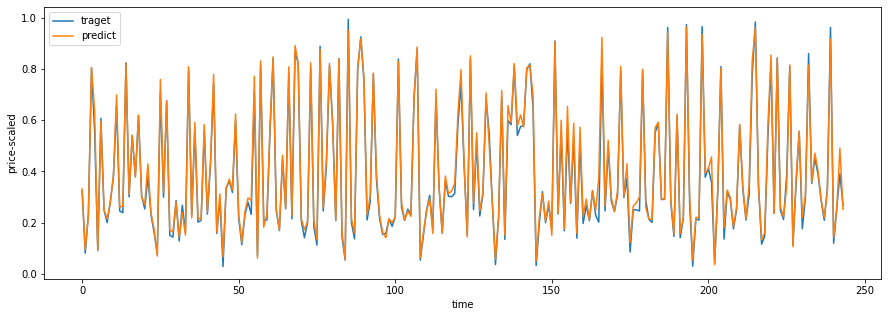

In [44]:
figure(figsize=(15, 5))
plt.plot(y_test)
plt.plot(predictions)
plt.xlabel('time')
plt.ylabel('price-scaled')
plt.legend(['traget', 'predict'])
plt.show()

In [45]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.9880812310435397

In [46]:
tomorrow_prediction = model.predict(X_meta_close[-1:, :])
tomorrow = scaler.inverse_transform(tomorrow_prediction)
tomorrow

array([[167.36696]], dtype=float32)